
=== Dataset: Blobs ===
KMeans: Silhouette=0.657, CH=958.0, DB=0.461, ARI=1.000, NMI=1.000
MiniBatchKMeans: Silhouette=0.657, CH=958.0, DB=0.461, ARI=1.000, NMI=1.000
DBSCAN: Silhouette=0.626, CH=632.5, DB=1.620, ARI=0.964, NMI=0.951
Agglomerative: Silhouette=0.657, CH=957.4, DB=0.460, ARI=0.991, NMI=0.987
Spectral: Silhouette=0.657, CH=958.0, DB=0.461, ARI=1.000, NMI=1.000
GMM: Silhouette=0.657, CH=958.0, DB=0.461, ARI=1.000, NMI=1.000


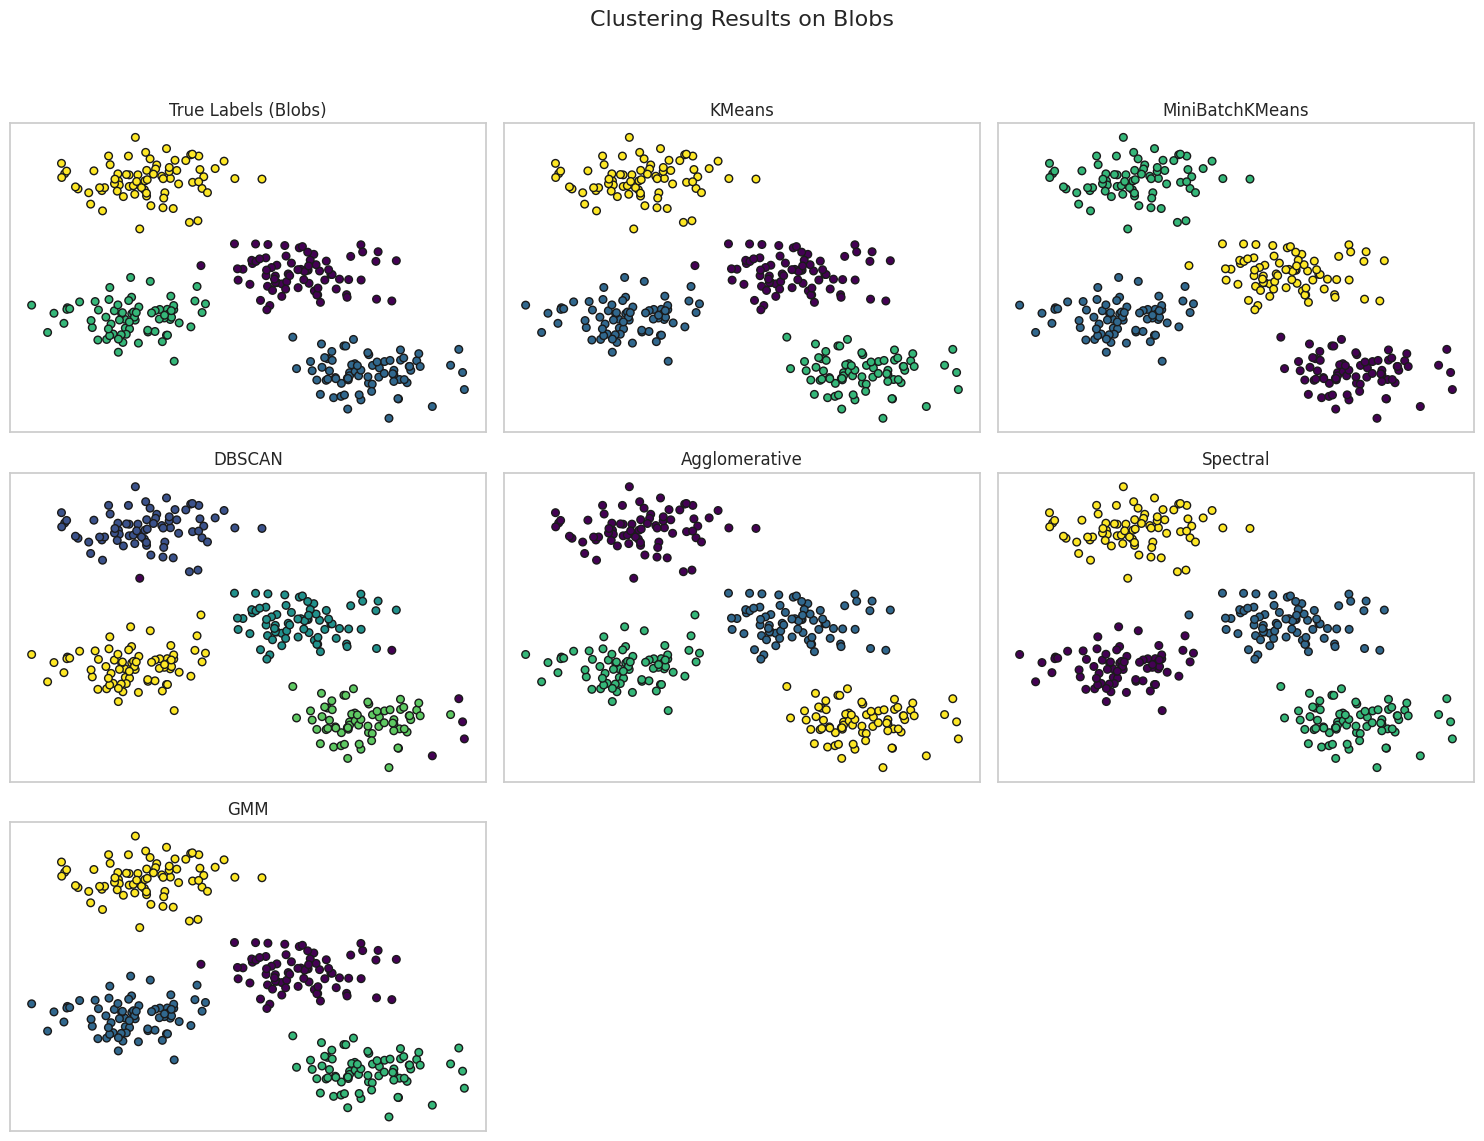


=== Dataset: Moons ===
KMeans: Silhouette=0.435, CH=383.6, DB=0.921, ARI=0.283, NMI=0.352
MiniBatchKMeans: Silhouette=0.447, CH=385.2, DB=0.911, ARI=0.305, NMI=0.359
DBSCAN: Silhouette=0.383, CH=254.8, DB=1.032, ARI=1.000, NMI=1.000
Agglomerative: Silhouette=0.420, CH=317.4, DB=0.906, ARI=0.397, NMI=0.506
Spectral: Silhouette=0.394, CH=269.8, DB=0.884, ARI=0.499, NMI=0.667
GMM: Silhouette=0.407, CH=347.2, DB=0.892, ARI=0.202, NMI=0.305


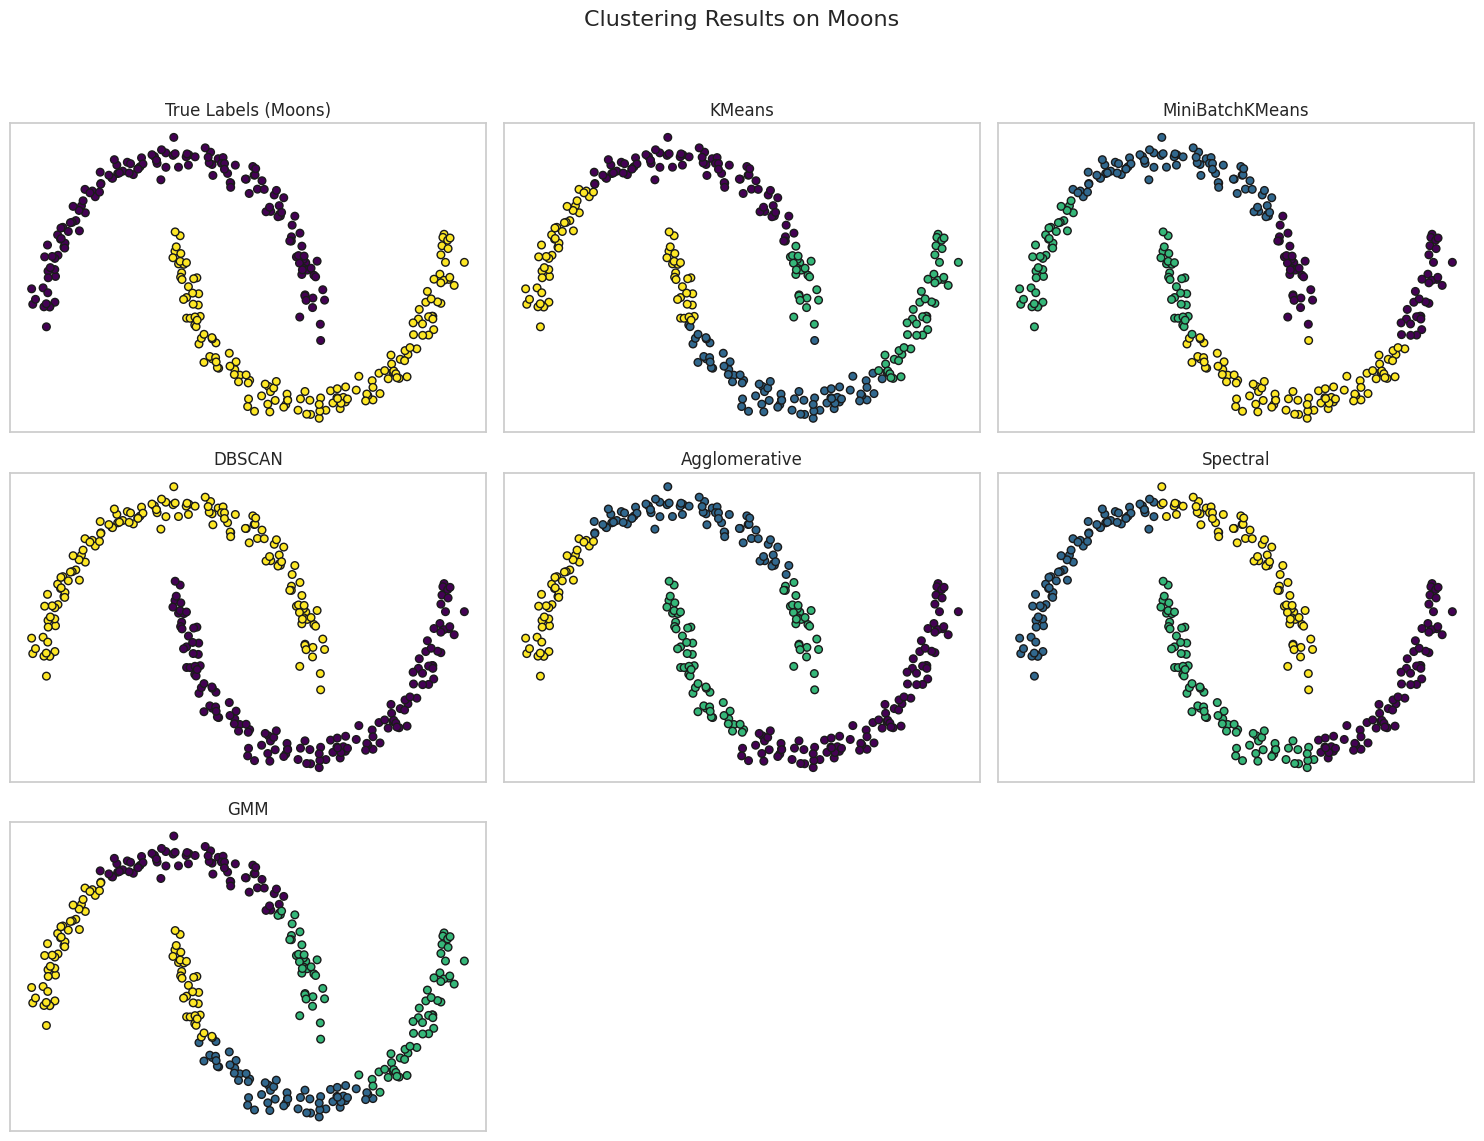


=== Dataset: Iris ===
KMeans: Silhouette=0.387, CH=207.3, DB=0.870, ARI=0.473, NMI=0.597
MiniBatchKMeans: Silhouette=0.414, CH=206.1, DB=0.922, ARI=0.571, NMI=0.619
DBSCAN: Silhouette=-0.194, CH=16.9, DB=2.142, ARI=0.088, NMI=0.278
Agglomerative: Silhouette=0.401, CH=201.3, DB=0.979, ARI=0.588, NMI=0.663
Spectral: Silhouette=0.389, CH=198.0, DB=0.837, ARI=0.539, NMI=0.651
GMM: Silhouette=0.231, CH=138.9, DB=1.322, ARI=0.782, NMI=0.820


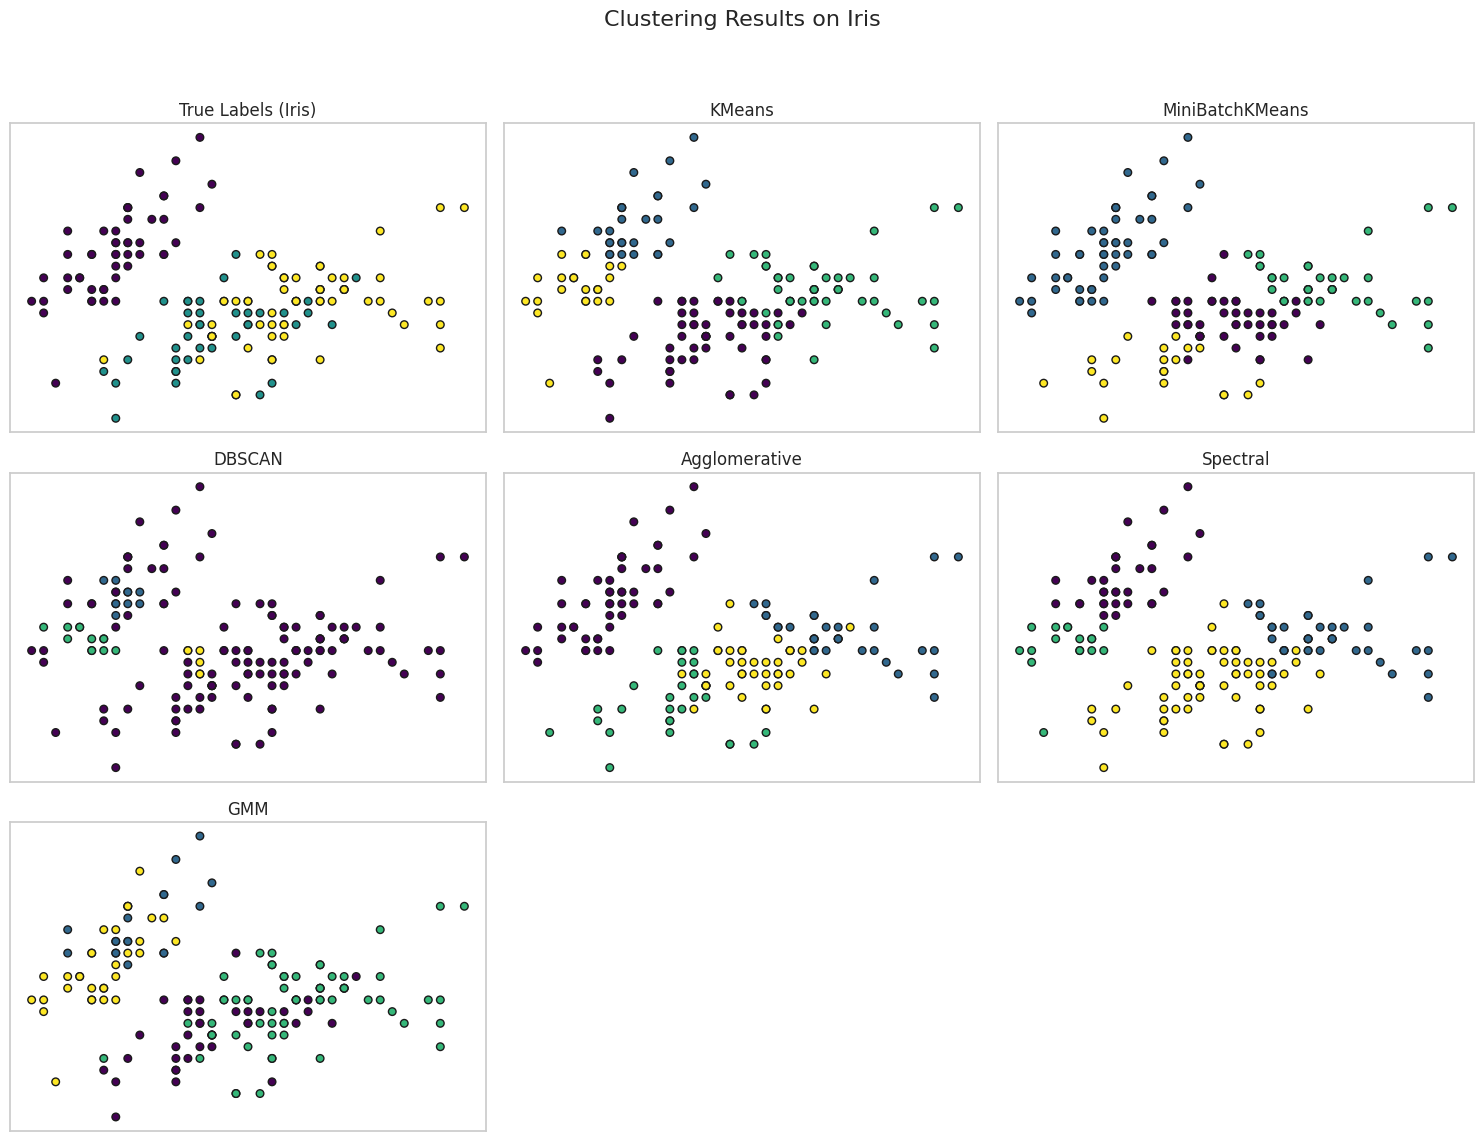


--- Clustering Evaluation Results ---

Dataset       Algorithm  Silhouette  Calinski-Harabasz  Davies-Bouldin      ARI      NMI
  Blobs          KMeans    0.656923         958.008789        0.461370 1.000000 1.000000
  Blobs MiniBatchKMeans    0.656923         958.008789        0.461370 1.000000 1.000000
  Blobs        Spectral    0.656923         958.008789        0.461370 1.000000 1.000000
  Blobs             GMM    0.656923         958.008789        0.461370 1.000000 1.000000
  Blobs   Agglomerative    0.656559         957.423275        0.459937 0.991081 0.987214
  Blobs          DBSCAN    0.626156         632.486096        1.619661 0.964288 0.950674
   Iris             GMM    0.231027         138.894565        1.321992 0.781868 0.819843
   Iris   Agglomerative    0.400636         201.251454        0.978821 0.587941 0.663414
   Iris MiniBatchKMeans    0.413613         206.074734        0.921677 0.571359 0.618694
   Iris        Spectral    0.388799         197.990077        0.836786

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    adjusted_rand_score, normalized_mutual_info_score
)

# 1. Define datasets
datasets = {
    "Blobs": make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0),
    "Moons": make_moons(n_samples=300, noise=0.05, random_state=0),
    "Iris": (load_iris().data, load_iris().target)
}

# 2. Define clustering algorithms
clustering_algorithms = {
    "KMeans": lambda X: KMeans(n_clusters=4, random_state=0).fit_predict(X),
    "MiniBatchKMeans": lambda X: MiniBatchKMeans(n_clusters=4, random_state=0).fit_predict(X),
    "DBSCAN": lambda X: DBSCAN(eps=0.3, min_samples=5).fit_predict(X),
    "Agglomerative": lambda X: AgglomerativeClustering(n_clusters=4, linkage='ward').fit_predict(X),
    "Spectral": lambda X: SpectralClustering(n_clusters=4, affinity='nearest_neighbors', n_neighbors=10, random_state=0).fit_predict(X),
    "GMM": lambda X: GaussianMixture(n_components=4, random_state=0).fit_predict(X)
}

results = []

# 3. Run clustering, evaluation, and visualization
for ds_name, (X, y_true) in datasets.items():
    print(f"\n=== Dataset: {ds_name} ===")

    # Scale features for better clustering performance
    X = StandardScaler().fit_transform(X)

    n_algorithms = len(clustering_algorithms)
    n_plots = n_algorithms + 1  # +1 for true labels
    cols = 3
    rows = (n_plots + cols - 1) // cols  # ceiling division

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axs = axs.flatten()

    # Plot true labels
    axs[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30, edgecolor='k')
    axs[0].set_title(f"True Labels ({ds_name})")
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    for i, (name, algorithm) in enumerate(clustering_algorithms.items(), start=1):
        y_pred = algorithm(X)

        # Plot clustering results
        axs[i].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30, edgecolor='k')
        axs[i].set_title(name)
        axs[i].set_xticks([])
        axs[i].set_yticks([])

        # Compute internal evaluation metrics
        try:
            sil = silhouette_score(X, y_pred)
            ch = calinski_harabasz_score(X, y_pred)
            db = davies_bouldin_score(X, y_pred)
        except Exception:
            sil = ch = db = np.nan

        # Compute external evaluation metrics
        try:
            ari = adjusted_rand_score(y_true, y_pred)
            nmi = normalized_mutual_info_score(y_true, y_pred)
        except Exception:
            ari = nmi = np.nan

        print(f"{name}: Silhouette={sil:.3f}, CH={ch:.1f}, DB={db:.3f}, ARI={ari:.3f}, NMI={nmi:.3f}")

        # Save results for summary
        results.append({
            "Dataset": ds_name,
            "Algorithm": name,
            "Silhouette": sil,
            "Calinski-Harabasz": ch,
            "Davies-Bouldin": db,
            "ARI": ari,
            "NMI": nmi
        })

    # Hide any extra subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.suptitle(f"Clustering Results on {ds_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 4. Display Results Summary
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by=["Dataset", "ARI"], ascending=[True, False])

print("\n--- Clustering Evaluation Results ---\n")
print(results_df_sorted.to_string(index=False))




=== Dataset: Blobs ===
KMeans: Silhouette=0.657, CH=958.0, DB=0.461, ARI=1.000, NMI=1.000
Agglomerative: Silhouette=0.657, CH=957.4, DB=0.460, ARI=0.991, NMI=0.987
Custom_KMeans: Silhouette=0.341, CH=215.1, DB=1.358, ARI=0.605, NMI=0.760
Custom_Agglomerative: Silhouette=0.657, CH=957.4, DB=0.460, ARI=0.991, NMI=0.987


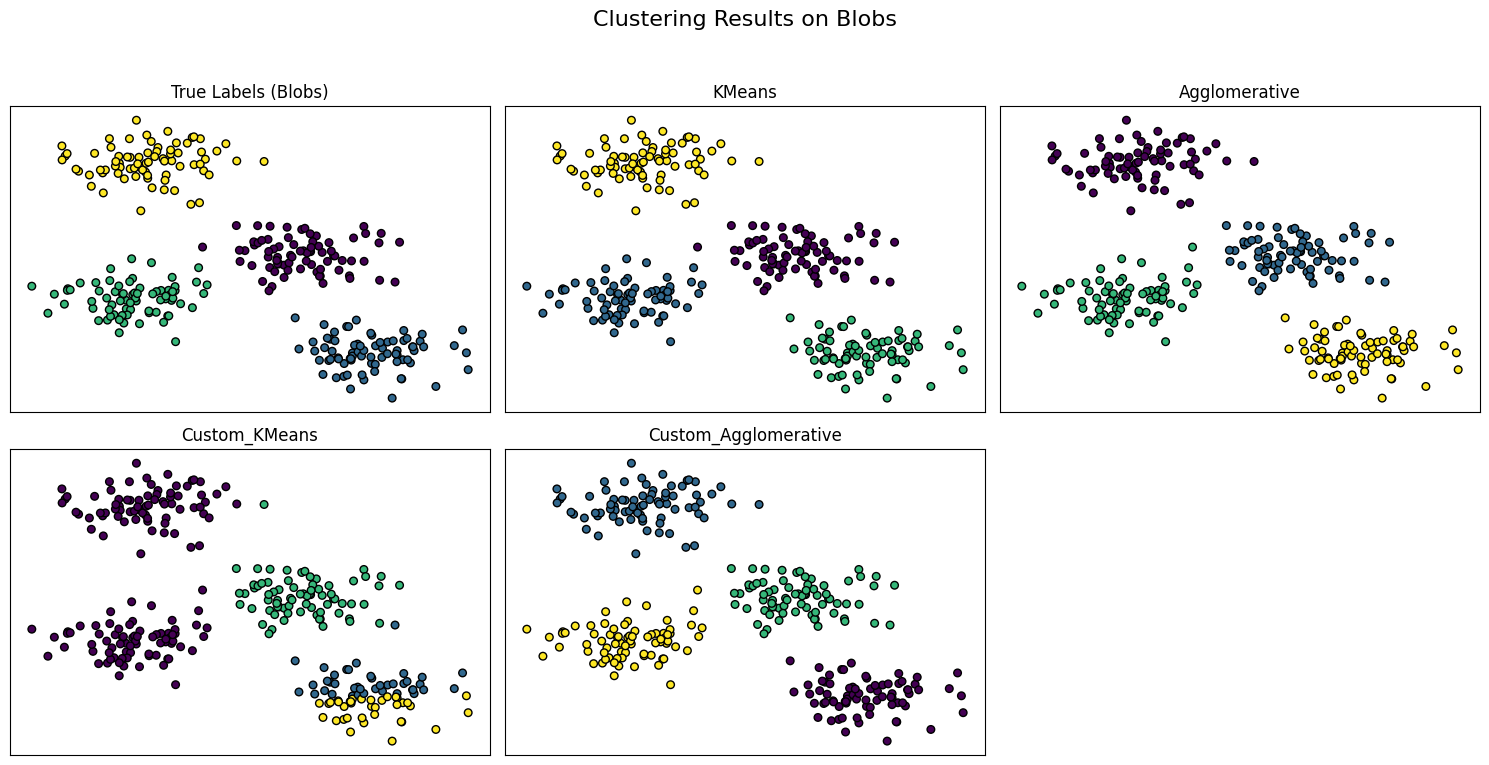


=== Dataset: Moons ===
KMeans: Silhouette=0.435, CH=383.6, DB=0.921, ARI=0.283, NMI=0.352
Agglomerative: Silhouette=0.420, CH=317.4, DB=0.906, ARI=0.397, NMI=0.506
Custom_KMeans: Silhouette=0.435, CH=383.6, DB=0.921, ARI=0.283, NMI=0.352
Custom_Agglomerative: Silhouette=-0.090, CH=88.4, DB=6.674, ARI=0.987, NMI=0.972


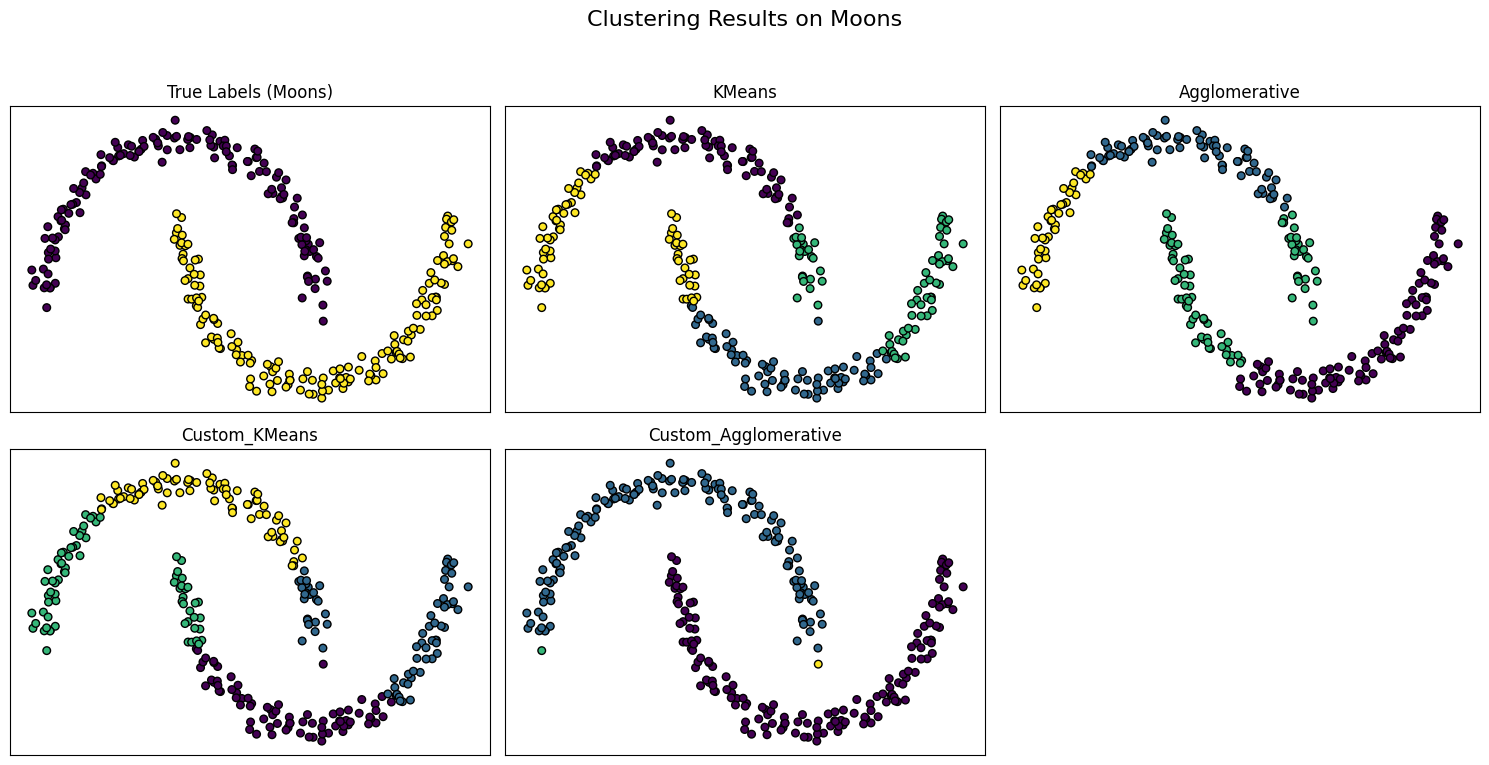


=== Dataset: Iris ===
KMeans: Silhouette=0.387, CH=207.3, DB=0.870, ARI=0.473, NMI=0.597
Agglomerative: Silhouette=0.401, CH=201.3, DB=0.979, ARI=0.588, NMI=0.663
Custom_KMeans: Silhouette=0.414, CH=206.1, DB=0.922, ARI=0.571, NMI=0.619
Custom_Agglomerative: Silhouette=0.407, CH=104.3, DB=0.502, ARI=0.552, NMI=0.701


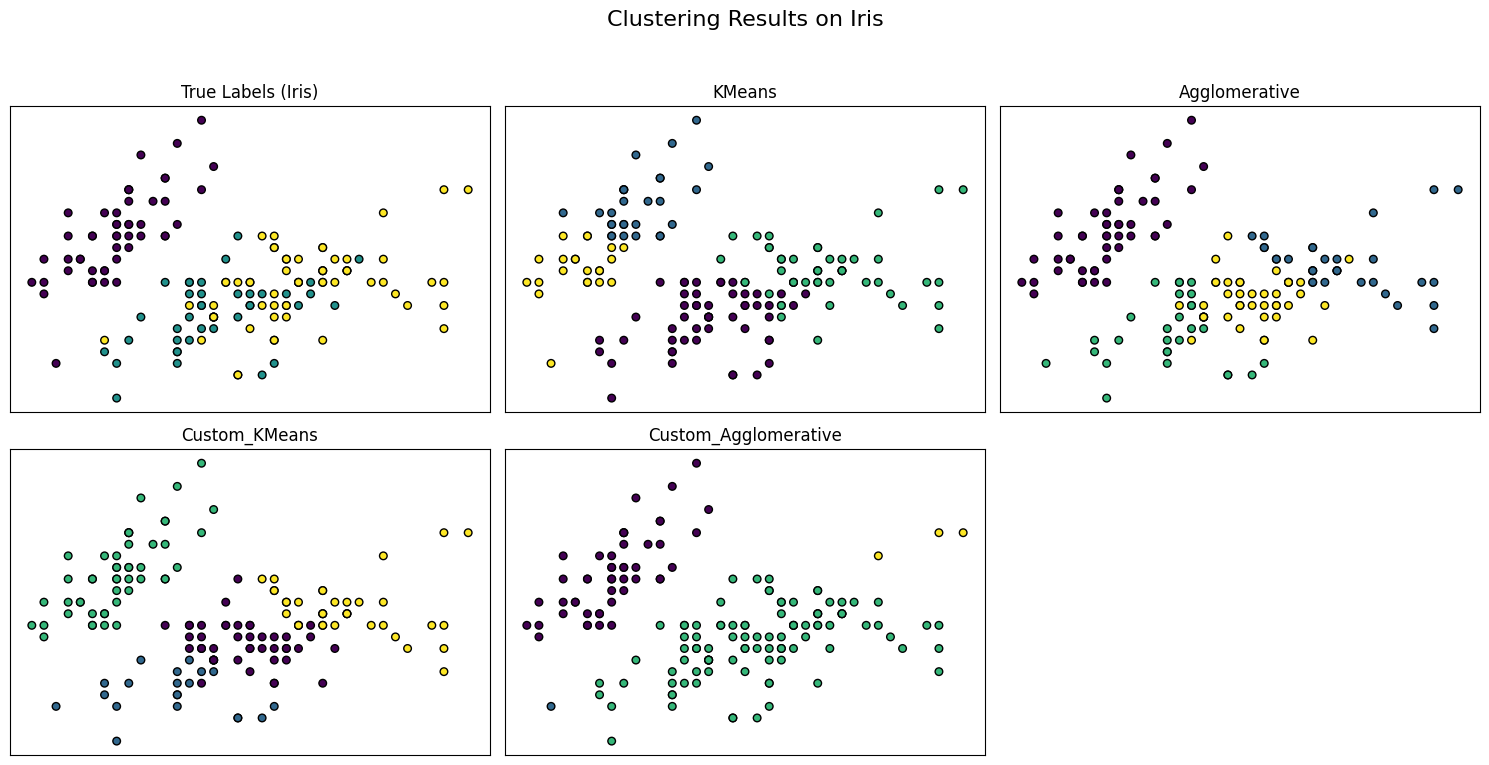


--- Clustering Evaluation Results ---

Dataset            Algorithm  Silhouette  Calinski-Harabasz  Davies-Bouldin      ARI      NMI
  Blobs               KMeans    0.656923         958.008789        0.461370 1.000000 1.000000
  Blobs        Agglomerative    0.656559         957.423275        0.459937 0.991081 0.987214
  Blobs Custom_Agglomerative    0.656559         957.423275        0.459937 0.991081 0.987214
  Blobs        Custom_KMeans    0.340741         215.068941        1.358407 0.604882 0.760239
   Iris        Agglomerative    0.400636         201.251454        0.978821 0.587941 0.663414
   Iris        Custom_KMeans    0.413613         206.074734        0.921677 0.571359 0.618694
   Iris Custom_Agglomerative    0.406746         104.291513        0.502445 0.552203 0.700554
   Iris               KMeans    0.386941         207.265914        0.869814 0.472818 0.597298
  Moons Custom_Agglomerative   -0.089924          88.382411        6.673883 0.986755 0.971937
  Moons        Agglo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    adjusted_rand_score, normalized_mutual_info_score
)
from scipy.spatial.distance import pdist, squareform

# ==========================
# Custom KMeans Implementation
# ==========================
def custom_kmeans(X, n_clusters=4, max_iter=100, tol=1e-4):
    np.random.seed(0)
    idx = np.random.choice(len(X), n_clusters, replace=False)
    centroids = X[idx]

    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([
            X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(n_clusters)
        ])

        if np.allclose(centroids, new_centroids, atol=tol):
            break
        centroids = new_centroids

    return labels

# ==========================
# Custom Agglomerative Clustering (Single Linkage)
# ==========================
def custom_agglomerative(X, n_clusters=4):
    N = len(X)
    clusters = [{i} for i in range(N)]
    distances = squareform(pdist(X))
    np.fill_diagonal(distances, np.inf)

    while len(clusters) > n_clusters:
        i, j = np.unravel_index(np.argmin(distances), distances.shape)
        new_cluster = clusters[i].union(clusters[j])
        clusters[i] = new_cluster
        del clusters[j]

        distances = np.delete(distances, j, axis=0)
        distances = np.delete(distances, j, axis=1)

        for k in range(len(clusters)):
            if k != i:
                dists = [np.linalg.norm(X[p1] - X[p2]) for p1 in clusters[i] for p2 in clusters[k]]
                distances[i, k] = distances[k, i] = np.min(dists)

        distances[i, i] = np.inf

    labels = np.zeros(N, dtype=int)
    for label, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = label
    return labels

# ==========================
# Define Datasets
# ==========================
datasets = {
    "Blobs": make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0),
    "Moons": make_moons(n_samples=300, noise=0.05, random_state=0),
    "Iris": (load_iris().data, load_iris().target)
}

# ==========================
# Clustering Algorithms
# ==========================
clustering_algorithms = {
    "KMeans": lambda X: KMeans(n_clusters=4, random_state=0).fit_predict(X),
    "Agglomerative": lambda X: AgglomerativeClustering(n_clusters=4, linkage='ward').fit_predict(X),
    "Custom_KMeans": lambda X: custom_kmeans(X, n_clusters=4),
    "Custom_Agglomerative": lambda X: custom_agglomerative(X, n_clusters=4)
}

# ==========================
# Run Clustering and Evaluation
# ==========================
results = []

for ds_name, (X, y_true) in datasets.items():
    print(f"\n=== Dataset: {ds_name} ===")

    X = StandardScaler().fit_transform(X)
    n_algorithms = len(clustering_algorithms)
    n_plots = n_algorithms + 1  # +1 for true labels
    cols = 3
    rows = (n_plots + cols - 1) // cols

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axs = axs.flatten()

    axs[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30, edgecolor='k')
    axs[0].set_title(f"True Labels ({ds_name})")
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    for i, (name, algorithm) in enumerate(clustering_algorithms.items(), start=1):
        try:
            y_pred = algorithm(X)
        except Exception as e:
            print(f"{name}: failed with error: {e}")
            y_pred = np.full(X.shape[0], -1)  # Dummy label to avoid crash

        axs[i].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30, edgecolor='k')
        axs[i].set_title(name)
        axs[i].set_xticks([])
        axs[i].set_yticks([])

        try:
            sil = silhouette_score(X, y_pred)
            ch = calinski_harabasz_score(X, y_pred)
            db = davies_bouldin_score(X, y_pred)
        except:
            sil = ch = db = np.nan

        try:
            ari = adjusted_rand_score(y_true, y_pred)
            nmi = normalized_mutual_info_score(y_true, y_pred)
        except:
            ari = nmi = np.nan

        print(f"{name}: Silhouette={sil:.3f}, CH={ch:.1f}, DB={db:.3f}, ARI={ari:.3f}, NMI={nmi:.3f}")

        results.append({
            "Dataset": ds_name,
            "Algorithm": name,
            "Silhouette": sil,
            "Calinski-Harabasz": ch,
            "Davies-Bouldin": db,
            "ARI": ari,
            "NMI": nmi
        })

    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.suptitle(f"Clustering Results on {ds_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# ==========================
# Display Results Summary
# ==========================
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by=["Dataset", "ARI"], ascending=[True, False])

print("\n--- Clustering Evaluation Results ---\n")
print(results_df_sorted.to_string(index=False))



=== Dataset: Iris ===
KMeans: Silhouette=0.460, CH=241.9, DB=0.834, ARI=0.620, NMI=0.659
Agglomerative: Silhouette=0.447, CH=222.7, DB=0.803, ARI=0.615, NMI=0.675
Custom_KMeans: Silhouette=0.457, CH=239.5, DB=0.828, ARI=0.645, NMI=0.661
Custom_Agglomerative: Silhouette=0.505, CH=131.5, DB=0.493, ARI=0.558, NMI=0.720


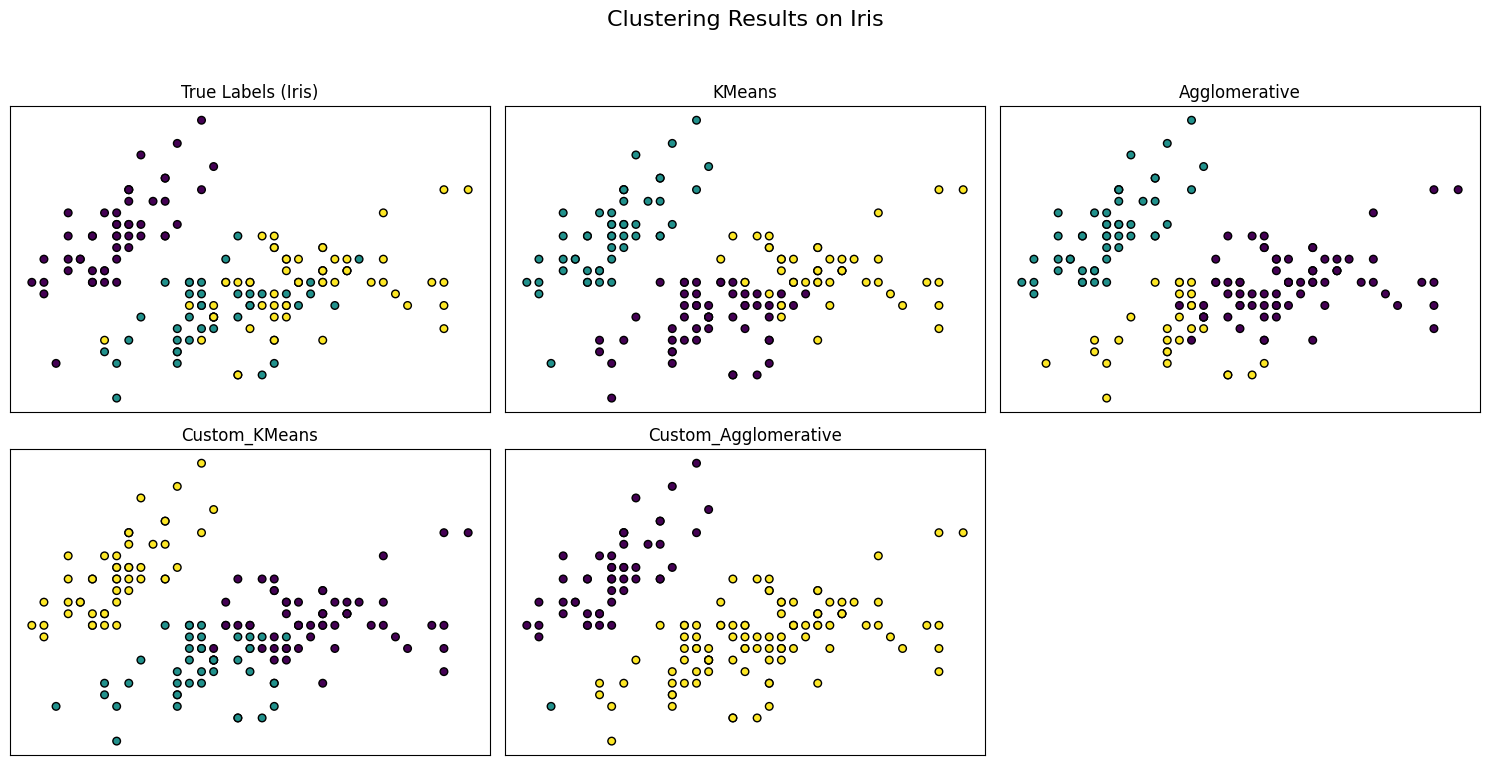


--- Clustering Evaluation Results ---

Dataset            Algorithm  Silhouette  Calinski-Harabasz  Davies-Bouldin      ARI      NMI
   Iris        Custom_KMeans    0.456535         239.484532        0.827512 0.645147 0.661287
   Iris               KMeans    0.459948         241.904402        0.833595 0.620135 0.659487
   Iris        Agglomerative    0.446689         222.719164        0.803467 0.615323 0.675470
   Iris Custom_Agglomerative    0.504646         131.535896        0.492925 0.558371 0.720118


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    adjusted_rand_score, normalized_mutual_info_score
)
from scipy.spatial.distance import pdist, squareform

# ==========================
# Custom KMeans Implementation
# ==========================
def custom_kmeans(X, n_clusters=4, max_iter=100, tol=1e-4):
    np.random.seed(0)
    idx = np.random.choice(len(X), n_clusters, replace=False)
    centroids = X[idx]

    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([
            X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(n_clusters)
        ])

        if np.allclose(centroids, new_centroids, atol=tol):
            break
        centroids = new_centroids

    return labels

# ==========================
# Custom Agglomerative Clustering (Single Linkage)
# ==========================
def custom_agglomerative(X, n_clusters=3):
    N = len(X)
    clusters = [{i} for i in range(N)]
    distances = squareform(pdist(X))
    np.fill_diagonal(distances, np.inf)

    while len(clusters) > n_clusters:
        i, j = np.unravel_index(np.argmin(distances), distances.shape)
        new_cluster = clusters[i].union(clusters[j])
        clusters[i] = new_cluster
        del clusters[j]

        distances = np.delete(distances, j, axis=0)
        distances = np.delete(distances, j, axis=1)

        for k in range(len(clusters)):
            if k != i:
                dists = [np.linalg.norm(X[p1] - X[p2]) for p1 in clusters[i] for p2 in clusters[k]]
                distances[i, k] = distances[k, i] = np.min(dists)

        distances[i, i] = np.inf

    labels = np.zeros(N, dtype=int)
    for label, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = label
    return labels

# ==========================
# Define Datasets
# ==========================
datasets = {

    "Iris": (load_iris().data, load_iris().target)
}

# ==========================
# Clustering Algorithms
# ==========================
clustering_algorithms = {
    "KMeans": lambda X: KMeans(n_clusters=3, random_state=0).fit_predict(X),
    "Agglomerative": lambda X: AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X),
    "Custom_KMeans": lambda X: custom_kmeans(X, n_clusters=3),
    "Custom_Agglomerative": lambda X: custom_agglomerative(X, n_clusters=3)
}

# ==========================
# Run Clustering and Evaluation
# ==========================
results = []

for ds_name, (X, y_true) in datasets.items():
    print(f"\n=== Dataset: {ds_name} ===")

    X = StandardScaler().fit_transform(X)
    n_algorithms = len(clustering_algorithms)
    n_plots = n_algorithms + 1  # +1 for true labels
    cols = 3
    rows = (n_plots + cols - 1) // cols

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axs = axs.flatten()

    axs[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30, edgecolor='k')
    axs[0].set_title(f"True Labels ({ds_name})")
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    for i, (name, algorithm) in enumerate(clustering_algorithms.items(), start=1):
        try:
            y_pred = algorithm(X)
        except Exception as e:
            print(f"{name}: failed with error: {e}")
            y_pred = np.full(X.shape[0], -1)  # Dummy label to avoid crash

        axs[i].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30, edgecolor='k')
        axs[i].set_title(name)
        axs[i].set_xticks([])
        axs[i].set_yticks([])

        try:
            sil = silhouette_score(X, y_pred)
            ch = calinski_harabasz_score(X, y_pred)
            db = davies_bouldin_score(X, y_pred)
        except:
            sil = ch = db = np.nan

        try:
            ari = adjusted_rand_score(y_true, y_pred)
            nmi = normalized_mutual_info_score(y_true, y_pred)
        except:
            ari = nmi = np.nan

        print(f"{name}: Silhouette={sil:.3f}, CH={ch:.1f}, DB={db:.3f}, ARI={ari:.3f}, NMI={nmi:.3f}")

        results.append({
            "Dataset": ds_name,
            "Algorithm": name,
            "Silhouette": sil,
            "Calinski-Harabasz": ch,
            "Davies-Bouldin": db,
            "ARI": ari,
            "NMI": nmi
        })

    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.suptitle(f"Clustering Results on {ds_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# ==========================
# Display Results Summary
# ==========================
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by=["Dataset", "ARI"], ascending=[True, False])

print("\n--- Clustering Evaluation Results ---\n")
print(results_df_sorted.to_string(index=False))
